<a href="https://colab.research.google.com/github/AjinJayan/AJ/blob/master/Copy_of_Copy_of_Predict_Boston_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12.0,9.0)


In [0]:
#Load the Boston Housing Data Set from sklearn.datasets and print it
from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [0]:

#      boston.feature_names = the column names of the data
#      boston.target = Our target variable or the price of the houses
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)


In [0]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
df_y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [0]:
df_x=(df_x-df_x.mean())/df_x.std()

In [0]:
theta=np.zeros([1,3])
theta

array([[0., 0., 0.]])

In [0]:
X = df_x.iloc[:339,0:13]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)


In [0]:
X.shape[0]

339

In [0]:

X

array([[ 1.        , -0.41936693,  0.28454827, ..., -1.45755797,
         0.44061589, -1.07449897],
       [ 1.        , -0.41692667, -0.48724019, ..., -0.3027945 ,
         0.44061589, -0.49195252],
       [ 1.        , -0.416929  , -0.48724019, ..., -0.3027945 ,
         0.39603507, -1.20753241],
       ...,
       [ 1.        , -0.41611751, -0.48724019, ...,  0.80577843,
         0.44061589, -0.39952929],
       [ 1.        , -0.41656627, -0.48724019, ...,  0.80577843,
         0.41772304, -0.29310254],
       [ 1.        , -0.41625819, -0.48724019, ...,  0.80577843,
         0.43229122, -0.5801747 ]])

In [0]:
X_test=df_x.iloc[339:506,0:13]
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
339,-0.413711,-0.487240,-0.866833,-0.272329,-0.342560,-0.426455,-0.823298,0.483047,-0.522484,-1.093155,0.805778,0.440616,-0.407931
340,-0.412951,-0.487240,-0.866833,-0.272329,-0.342560,-0.450650,-0.357915,0.483047,-0.522484,-1.093155,0.805778,0.440616,-0.470947
341,-0.418589,1.013460,-1.401791,-0.272329,-0.972535,1.361148,-0.684749,1.540030,-0.981871,-0.737150,-1.365177,0.416956,-1.003081
342,-0.417198,-0.487240,-1.347858,-0.272329,-0.316671,0.363449,-0.315285,1.173883,-0.981871,0.081661,-1.180415,0.364598,-0.560570
343,-0.417145,1.871002,-1.072362,-0.272329,-0.610084,0.585476,-0.432518,0.919907,-0.522484,-0.226877,-0.395176,0.440616,-0.766422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [0]:
y=df_y.iloc[:339].values
theta=np.zeros([1,14])
theta

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [0]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    return theta,cost


    
g,cost = gradientDescent(X,y,theta,1000,0.005)

In [0]:
print(g)

[[13.98913074 -4.69681162 -0.24000065  0.26639417  0.27309679 -0.2924336
   5.33646591 -0.11831201 -1.40253137 -6.67205066 -4.65738083 -2.24417471
   1.69977533 -2.20817475]]


In [0]:
g.shape

(1, 14)

In [0]:
g[0][1:14]

array([-4.69681162, -0.24000065,  0.26639417,  0.27309679, -0.2924336 ,
        5.33646591, -0.11831201, -1.40253137, -6.67205066, -4.65738083,
       -2.24417471,  1.69977533, -2.20817475])

In [0]:
finalCost=computeCost(X,y,g)
print(finalCost)

7.2001960905553695


In [0]:
y_predict=np.dot(X_test,g[0][1:14].T)
y_predict

array([  7.41780607,   7.3692074 ,  22.71588384,  12.7434342 ,
        11.08480175,  12.69293365,   4.65154515,   2.68460694,
         8.97000214,  12.92969333,  13.30032147,   9.93384489,
         5.93255708,   0.42095111,  13.1930093 ,  -3.34052528,
        -0.65067595, -22.78772917, -17.23071292, -19.48776217,
       -20.46756528, -17.27504938, -20.29541778, -25.05643932,
       -22.65888032,   3.43652026, -38.25819   , -30.09560273,
       -46.70083755, -25.80669682, -12.29399085,  -9.58997105,
       -20.71420697, -21.86449618, -39.01710984, -49.85021114,
       -18.87523282, -25.21977939, -19.91723232, -31.37588039,
       -28.8955607 , -60.58024418, -25.17162889, -30.08048693,
       -29.81508763, -49.01325915, -38.32981371, -46.46989279,
       -43.9828981 , -40.49647034, -29.86746096, -25.7783255 ,
       -23.20859252, -35.94043091, -22.27928603, -27.54565574,
       -20.88416908, -20.39192733, -26.59648551, -48.71941938,
       -30.97792013, -36.28298496, -25.67217785, -23.10

In [0]:

y_cost_predit=y_predict+13.98913074 

In [0]:
y_cost_predit.shape

(167,)

In [0]:
y_new=np.reshape(y_cost_predit,(167,1))
y_new.shape

(167, 1)

In [0]:
df_y.iloc[339:506].shape


(167, 1)

In [0]:
g

array([[13.98913074, -4.69681162, -0.24000065,  0.26639417,  0.27309679,
        -0.2924336 ,  5.33646591, -0.11831201, -1.40253137, -6.67205066,
        -4.65738083, -2.24417471,  1.69977533, -2.20817475]])

In [0]:
print(np.mean((df_y.iloc[339:506]-y_new)**2))

0    871.587118
dtype: float64


Text(0, 0.5, 'Cost')

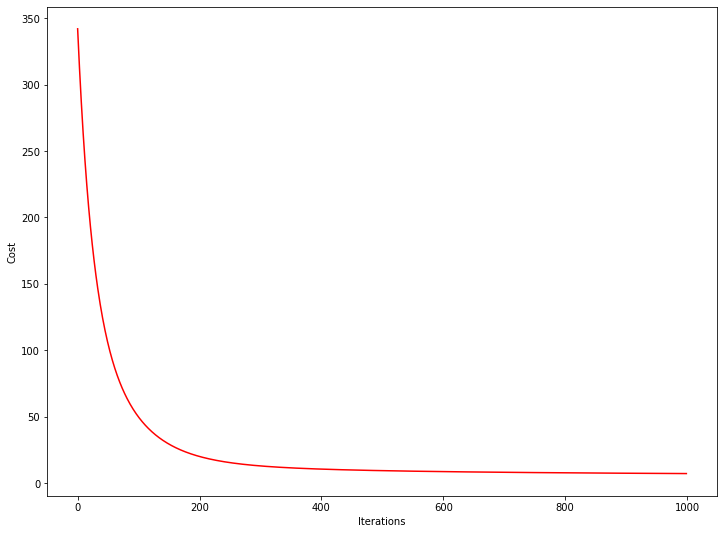

In [0]:
g, ax = plt.subplots()  
ax.plot(np.arange(1000), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')